<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Dataset-Titanic" data-toc-modified-id="Import-Dataset-Titanic-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Dataset Titanic</a></span><ul class="toc-item"><li><span><a href="#Join-datasets" data-toc-modified-id="Join-datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Join datasets</a></span></li></ul></li><li><span><a href="#Analise-exploratoria-do-Dataset" data-toc-modified-id="Analise-exploratoria-do-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analise exploratoria do Dataset</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing Values</a></span><ul class="toc-item"><li><span><a href="#input-Age" data-toc-modified-id="input-Age-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>input Age</a></span><ul class="toc-item"><li><span><a href="#Input-Age-por-Title-e-Pclasse-,-utilzando-a-Mediana" data-toc-modified-id="Input-Age-por-Title-e-Pclasse-,-utilzando-a-Mediana-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Input Age por Title e Pclasse , utilzando a Mediana</a></span></li></ul></li><li><span><a href="#Input-Fare" data-toc-modified-id="Input-Fare-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Input Fare</a></span></li><li><span><a href="#Input-Cabin" data-toc-modified-id="Input-Cabin-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Input Cabin</a></span></li><li><span><a href="#Input-Embarked" data-toc-modified-id="Input-Embarked-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Input Embarked</a></span></li></ul></li><li><span><a href="#Continuando-analise-exploratória" data-toc-modified-id="Continuando-analise-exploratória-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Continuando analise exploratória</a></span></li><li><span><a href="#Feature-Engineer" data-toc-modified-id="Feature-Engineer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineer</a></span><ul class="toc-item"><li><span><a href="#Sibsp" data-toc-modified-id="Sibsp-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sibsp</a></span></li><li><span><a href="#Parch" data-toc-modified-id="Parch-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Parch</a></span></li><li><span><a href="#Nomrmalização-Age-e-Fare-Min/Max" data-toc-modified-id="Nomrmalização-Age-e-Fare-Min/Max-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Nomrmalização Age e Fare Min/Max</a></span></li><li><span><a href="#Ft_Prioridade" data-toc-modified-id="Ft_Prioridade-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Ft_Prioridade</a></span></li><li><span><a href="#Nivel-Deck" data-toc-modified-id="Nivel-Deck-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Nivel Deck</a></span></li></ul></li><li><span><a href="#Label-Enconding" data-toc-modified-id="Label-Enconding-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Label Enconding</a></span><ul class="toc-item"><li><span><a href="#Binarização" data-toc-modified-id="Binarização-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Binarização</a></span></li></ul></li><li><span><a href="#Construindo-Modelo" data-toc-modified-id="Construindo-Modelo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Construindo Modelo</a></span></li><li><span><a href="#Feature-Selection-Baseado-em-Algoritmos-de-Árvore" data-toc-modified-id="Feature-Selection-Baseado-em-Algoritmos-de-Árvore-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Selection Baseado em Algoritmos de Árvore</a></span></li><li><span><a href="#Predict" data-toc-modified-id="Predict-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Predict</a></span></li></ul></div>

In [1401]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

#IMAGENS.
from IPython.display import Image as img

#OUTROS.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

 # Import Dataset Titanic

In [1402]:
train_csv= pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [1403]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1404]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Join datasets

In [1405]:
titanic=pd.concat([train_csv,test_csv],axis=0,ignore_index=False)


In [1406]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Analise exploratoria do Dataset 

In [1407]:
print('Percentual de Sobreviventes x Não Sobreviventes - ',
       round(titanic.groupby('Survived').Sex.count()/titanic.Name.count()*100,2))

Percentual de Sobreviventes x Não Sobreviventes -  Survived
0.0    41.94
1.0    26.13
Name: Sex, dtype: float64


In [1408]:
print('Missig Values:')
titanic.isnull().sum()

Missig Values:


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

* Cabin e Age são os que mais faltam valores
* Survived são do conjunto de teste, é o que vamos prever, por isso estão nulos

Text(0.5, 1.0, 'Distribution of the field Age')

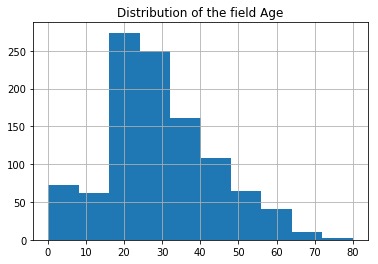

In [1409]:
titanic.Age.hist()
plt.title("Distribution of the field Age")

* there are a concentration of the age between 18 and 35 years

Text(0.5, 1.0, 'Distribution of the field Fare')

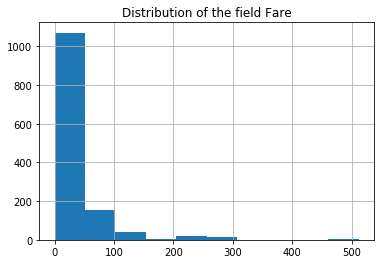

In [1410]:
titanic.Fare.hist()
plt.title("Distribution of the field Fare")

* there are a concentration of the Fare between 0 and 50

# Missing Values

 Com base no valores da feature Age e Cabin, vamos começar por elas o preenchimento dos "Missing Values"

## input Age

Analise exploratoria de Age para encontrar a melhor maneira de inputar os dados

Antes irei Criar uma nova coluna Suvived com Label- "Vivo/Morto"

In [1411]:
titanic.loc[titanic.Survived==0,'Status_Survived']='Morto'
titanic.loc[titanic.Survived==1,'Status_Survived']='Vivo'

In [1412]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Status_Survived
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Morto
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Vivo
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Vivo
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Vivo
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Morto


Text(0.5, 1.0, 'Boxplot - Age x Survived')

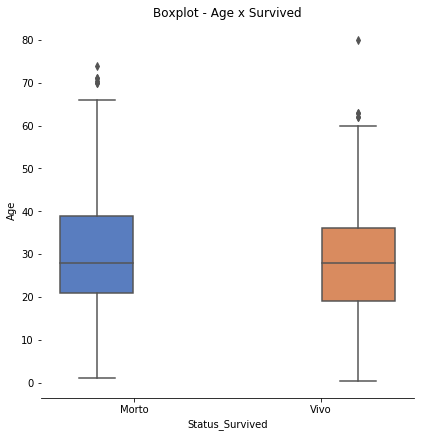

In [1413]:
g = sns.factorplot(x="Status_Survived",y="Age", hue ='Status_Survived',data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived')

Text(0.5, 1.0, 'Boxplot - Age x Survived por Sex')

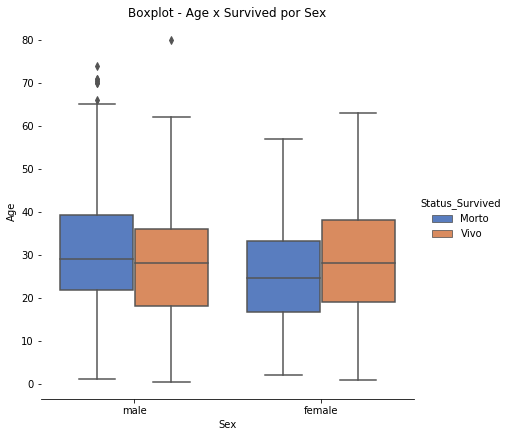

In [1414]:
g = sns.factorplot(x="Sex",y="Age", hue ='Status_Survived',data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived por Sex')

Text(0.5, 1.0, 'Boxplot - Age x Survived por Pclass')

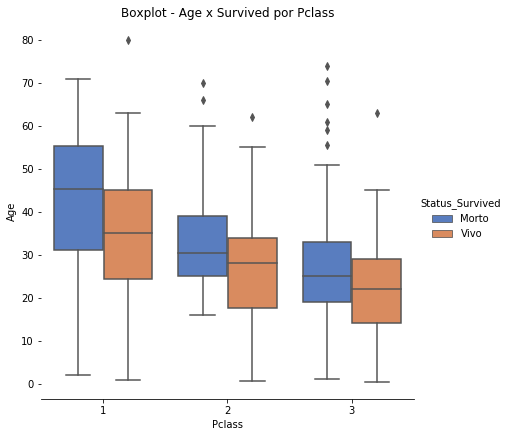

In [1415]:
g = sns.factorplot(x="Pclass",y="Age", hue ='Status_Survived',data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived por Pclass')

* Nitidamente podemos visualizar que conforme nivel Pclass aumenta(menor classe) a idade diminui.
* Conforme visualizações acima Pclass é uma boa feature para inputar Age faltante,ou seja,por Pclass.


***A Coluna Name também pode nos ajudar, pois nela há titulos, mr, miss, etc***

In [1416]:
titanic['Title']=[i.split(",")[1].split(".")[0].strip() for i in titanic["Name"]]

In [1417]:
titanic.groupby('Embarked').Title.count()

Embarked
C    270
Q    123
S    914
Name: Title, dtype: int64

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

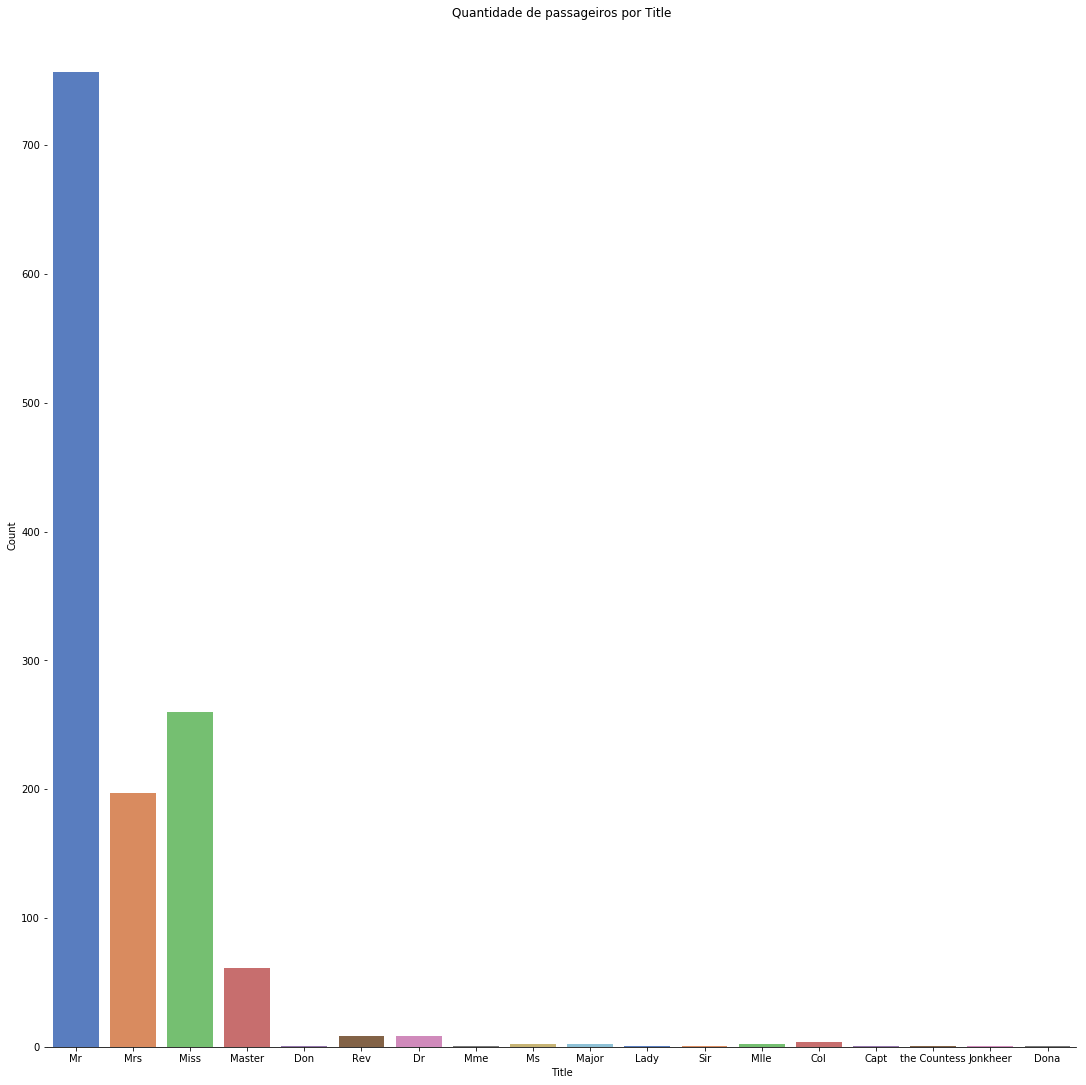

In [1418]:
g = sns.factorplot("Title",
                   data=titanic,
                   size=15, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

* Há uma padrão em Mr, Mrs, Miss e Master
* Vamos agrupar os outros que possuem poucos passageiros

In [1419]:
titanic["Title"] = titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic["Title"] = titanic["Title"].replace(['Mme','Mlle','Ms'], 'Miss')

Text(0.5, 1.0, 'Quantidade de passageiros por Title')

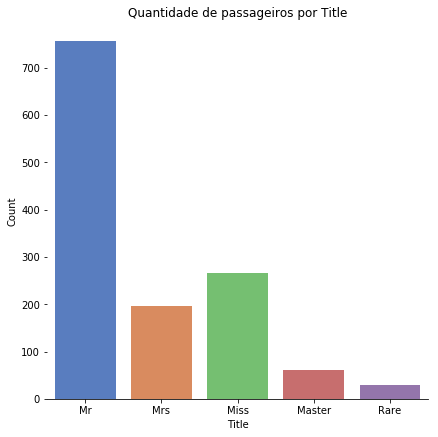

In [1420]:
g = sns.factorplot("Title",
                   data=titanic,
                   size=6, 
                   kind="count", 
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
plt.title('Quantidade de passageiros por Title')

In [1421]:
titanic.groupby('Title').Title.count()

Title
Master     61
Miss      265
Mr        757
Mrs       197
Rare       29
Name: Title, dtype: int64

* Master - Homens Jovens
* Miss - é usado antes de sobrenomes ou nomes completos de mulheres que não são casadas. É algo próximo a “senhorita”, em português.

* Mr - Se utiliza antes de sobrenomes ou nomes completos de homens em geral, independente do seu estado civil.
* Mrs- é usado antes de sobrenomes ou nomes completos de mulheres casadas.
* Ms- é usado antes de sobrenomes ou nomes completos de mulheres em geral,independente do seu estado civil




### Input Age por Title e Pclasse , utilzando a Mediana

In [1422]:
df_media= titanic.groupby(['Pclass','Title']).Age.median().reset_index()

In [1423]:
df_merge= pd.merge(titanic,df_media, on=['Pclass','Title']).reset_index()   

In [1424]:
df_merge.loc[df_merge.Age_x.isna()==True,'Age_x'] = df_merge.loc[df_merge.Age_x.isna()==True,'Age_y']

In [1425]:
df_merge =df_merge.rename(columns={'Age_x':'Age'})

In [1426]:
titanic=df_merge

In [1427]:
titanic=titanic.sort_values('PassengerId').reset_index()   

In [1428]:
print(titanic[0:890].Survived.isna().sum())
print(titanic[891:1309].Survived.isna().sum())

0
418


In [1429]:
print('Missig Values:')
df_merge.isnull().sum()

Missig Values:


index                 0
Age                   0
Cabin              1014
Embarked              2
Fare                  1
Name                  0
Parch                 0
PassengerId           0
Pclass                0
Sex                   0
SibSp                 0
Survived            418
Ticket                0
Status_Survived     418
Title                 0
Age_y                 0
dtype: int64

In [1454]:
titanic.loc[titanic.Age < 1 ,'Age'] = 1

Text(0.5, 1.0, 'Distribution of the field Age')

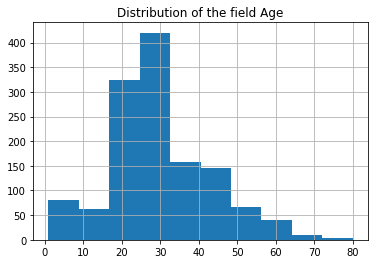

In [1455]:
titanic.Age.hist()
plt.title("Distribution of the field Age")

## Input Fare

In [1431]:
titanic.loc[titanic.Fare.isna(),'Fare']=titanic.Fare.mean()

In [1324]:
titanic.isna().sum()

level_0               0
index                 0
Age                   0
Cabin              1014
Embarked              2
Fare                  0
Name                  0
Parch                 0
PassengerId           0
Pclass                0
Sex                   0
SibSp                 0
Survived            418
Ticket                0
Status_Survived     418
Title                 0
Age_y                 0
dtype: int64

In [1459]:
titanic.loc[titanic.Fare < 1.000 ,'Fare'] = 1.000

In [1463]:
titanic.Fare.describe()

count    1309.000000
mean       33.308466
std        51.730638
min         1.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

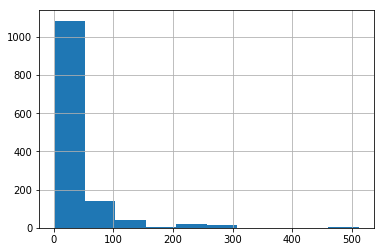

In [1464]:
titanic.Fare.hist()

## Input Cabin

 Vamos tentar combinar informações de Ticket e Fare para tentar determinar a Cabin

In [1438]:
titanic['Ft_Cabin'] = titanic['Ticket'].str.strip()

In [1439]:
titanic.Ft_Cabin.str.extract('([a-zA-Z]+)', expand=False).unique()

array(['A', 'PC', 'STON', nan, 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W',
       'SOTON', 'Fa', 'LINE', 'F', 'SW', 'SCO', 'P', 'WE', 'AQ', 'LP'],
      dtype=object)

In [1440]:
titanic['Ft_Cabin'] = titanic.Ft_Cabin.str.extract('([a-zA-Z])', expand=False)

In [1441]:
titanic.Ft_Cabin[titanic.Ft_Cabin.isna()] = 'Uknow'

In [1442]:
titanic.groupby('Ft_Cabin').Ft_Cabin.count()

Ft_Cabin
A         42
C         77
F         13
L          5
P         98
S         98
Uknow    957
W         19
Name: Ft_Cabin, dtype: int64

In [1443]:
titanic.isna().sum()

level_0               0
index                 0
Age                   0
Cabin              1014
Embarked              2
Fare                  0
Name                  0
Parch                 0
PassengerId           0
Pclass                0
Sex                   0
SibSp                 0
Survived            418
Ticket                0
Status_Survived     418
Title                 0
Age_y                 0
Ft_Cabin              0
dtype: int64

In [1444]:
titanic.Ft_Cabin[titanic.Ft_Cabin =='Uknow'] = titanic.Cabin[titanic.Ft_Cabin =='Uknow'].str.extract('([a-zA-Z])', expand=False)

In [1445]:
titanic.Ft_Cabin[titanic.Ft_Cabin.isna()] = 'Uknow'

In [1446]:
titanic["Ft_Cabin"] = titanic["Ft_Cabin"].replace(['L','T','W'], 'G')


In [1447]:
titanic.loc[titanic.Cabin.isna(),'Cabin'] = 'Uknow'

In [1448]:
titanic.loc[titanic.Ft_Cabin.isna(),'Ft_Cabin'] = 'Uknow'


In [1449]:
titanic.groupby('Ft_Cabin').Survived.count()


Ft_Cabin
A         41
B         31
C         91
D         26
E         23
F         18
G         20
P         65
S         65
Uknow    511
Name: Survived, dtype: int64

In [1450]:
titanic.isnull().sum()

level_0              0
index                0
Age                  0
Cabin                0
Embarked             2
Fare                 0
Name                 0
Parch                0
PassengerId          0
Pclass               0
Sex                  0
SibSp                0
Survived           418
Ticket               0
Status_Survived    418
Title                0
Age_y                0
Ft_Cabin             0
dtype: int64

## Input Embarked

In [1451]:
mode =  titanic.Embarked.mode()
print(mode)


0    S
dtype: object


In [1452]:
titanic.loc[titanic.Embarked.isna(),'Embarked'] = 'S'

In [1453]:
titanic.Embarked.isna().sum()

0

* Por ser apenas dua observações , foi preenchida com a moda

# Continuando analise exploratória 

In [1483]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
level_0            1309 non-null int64
index              1309 non-null int64
Age                1309 non-null float64
Cabin              1309 non-null object
Embarked           1309 non-null object
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           891 non-null float64
Ticket             1309 non-null object
Status_Survived    891 non-null object
Title              1309 non-null object
Age_y              1309 non-null float64
Ft_Cabin           1309 non-null object
dtypes: float64(4), int64(6), object(8)
memory usage: 184.2+ KB


Text(0.5, 1.0, 'Boxplot - Age x sex')

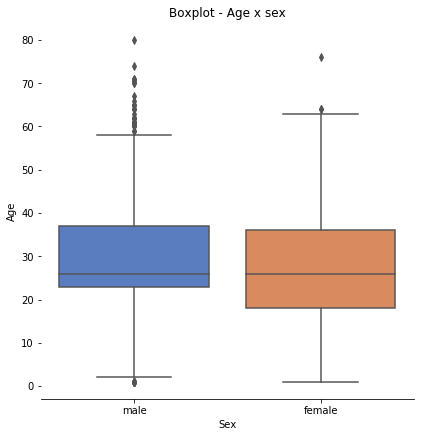

In [1475]:
g = sns.factorplot(x="Sex",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x sex')

Text(0.5, 1.0, 'Boxplot - Fare x sex')

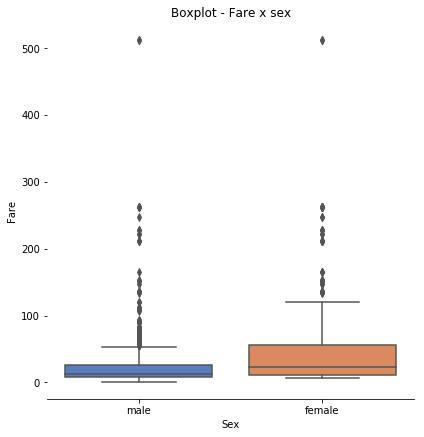

In [1491]:
g = sns.factorplot(x="Sex",y="Fare",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x sex')

Text(0.5, 1.0, 'Boxplot - Age x Pclass')

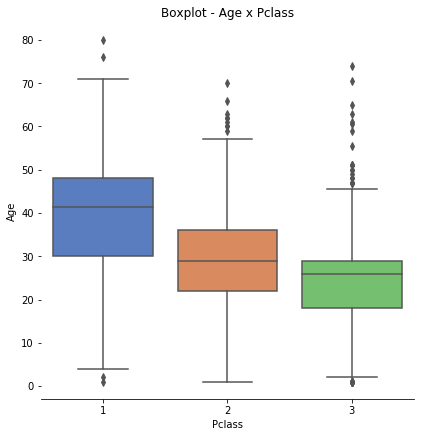

In [1477]:
g = sns.factorplot(x="Pclass",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Pclass')

Text(0.5, 1.0, 'Boxplot - Fare x Pclass')

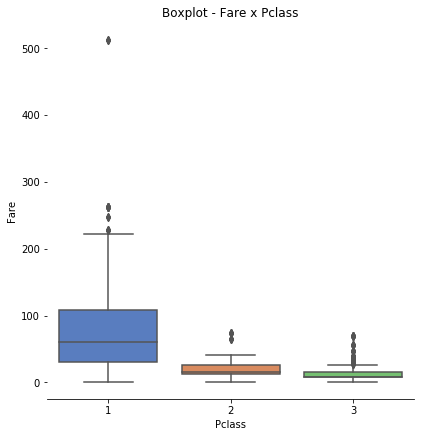

In [1485]:
g = sns.factorplot(x="Pclass",y="Fare",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x Pclass')

Text(0.5, 1.0, 'Boxplot - Age x Embarked')

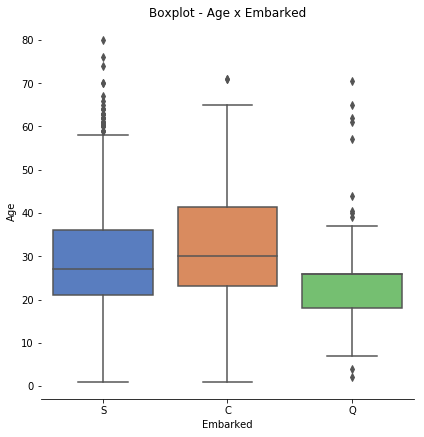

In [1481]:
g = sns.factorplot(x="Embarked",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Embarked')

Text(0.5, 1.0, 'Boxplot - Fare x Embarked')

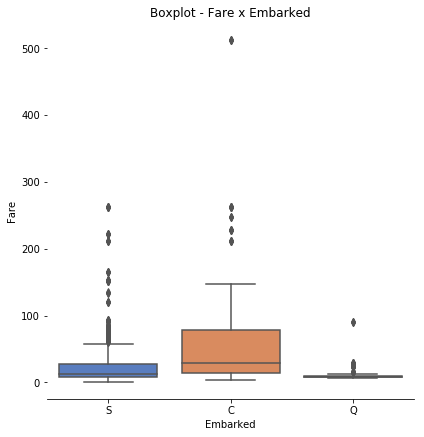

In [1486]:
g = sns.factorplot(x="Embarked",y="Fare",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x Embarked')

Text(0.5, 1.0, 'Boxplot - Age x Title')

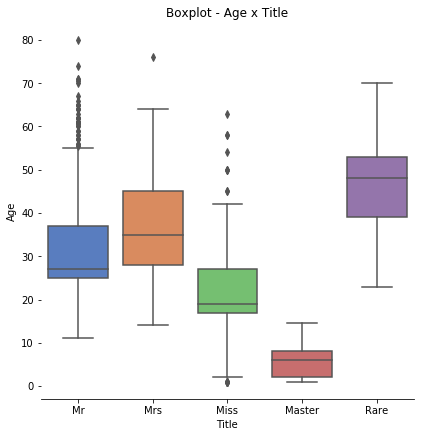

In [1482]:
g = sns.factorplot(x="Title",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Title')

In [1541]:
titanic.loc[titanic.Age  <  12,'Fx_Age'] = '1_11'
titanic.loc[(titanic.Age >= 12) & (titanic.Age < 26),'Fx_Age']    = '12_25'
titanic.loc[(titanic.Age >= 26) & (titanic.Age < 41),'Fx_Age']    = '26_40'
titanic.loc[(titanic.Age >= 41) & (titanic.Age < 56),'Fx_Age']    = '41_55'
titanic.loc[titanic.Age  >= 56,'Fx_Age'] = '56_80'



Text(0.5, 1.0, 'Boxplot - Age x Title')

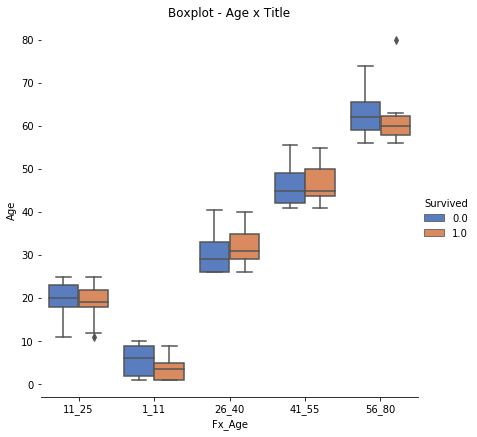

In [1543]:
g = sns.factorplot(x="Fx_Age",y="Age",hue='Survived', data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Title')

Text(0.5, 1.0, 'Boxplot - Fare x Title')

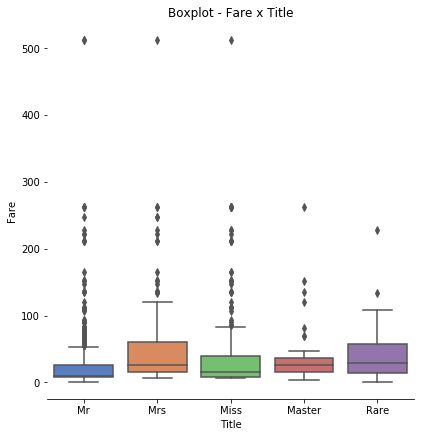

In [1487]:
g = sns.factorplot(x="Title",y="Fare",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x Title')

Text(0.5, 1.0, 'Boxplot - Age x Survived')

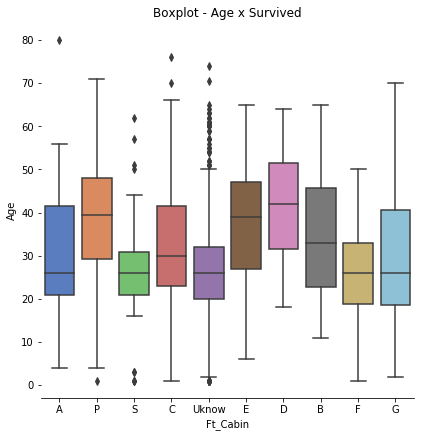

In [1505]:
g = sns.factorplot(x="Ft_Cabin",y="Age",data=titanic,kind="box", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Age")
plt.title('Boxplot - Age x Survived')

(1.0, 200.0)

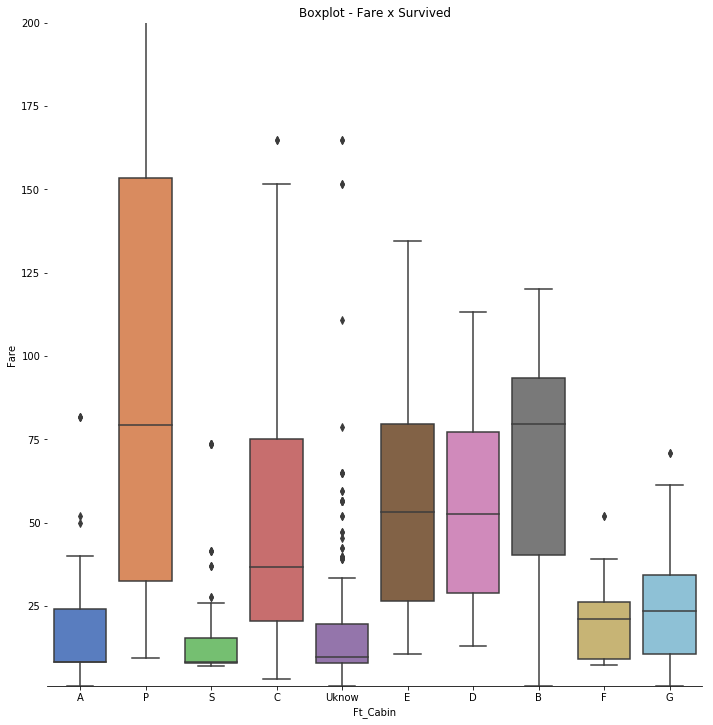

In [1507]:
g = sns.factorplot(x="Ft_Cabin",y="Fare",data=titanic,kind="box", size = 10,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x Survived')
plt.ylim(titanic.Fare.min(),200.000)

In [1524]:
titanic.loc[titanic.Fare  <  26.000,'Fx_Fare'] = '0_25'

titanic.loc[(titanic.Fare >= 26.000) & (titanic.Fare < 76.000),'Fx_Fare']  = '26_75'

titanic.loc[(titanic.Fare  >=  76.000)& (titanic.Fare < 151.000),'Fx_Fare']='76_150'

titanic.loc[titanic.Fare  >=  151.000, 'Fx_Fare']='151_512'

Text(0.5, 1.0, 'Boxplot - Fare x Survived')

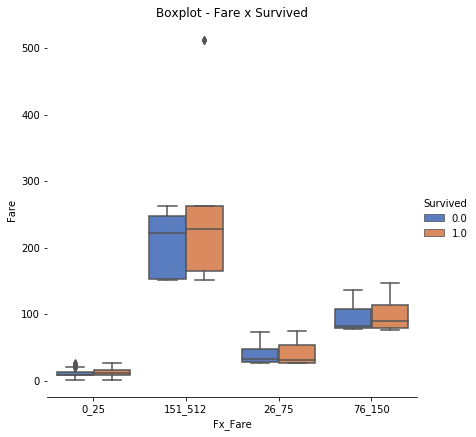

In [1544]:
g = sns.factorplot(x="Fx_Fare",y="Fare", hue='Survived',data=titanic,kind="box", size = 6,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Fare")
plt.title('Boxplot - Fare x Survived')

# Feature Engineer


## Sibsp


sibsp : O conjunto de dados define relações familiares desta forma  
Irmão = irmã, irmão, meio-irmão, irmã adotiva  
Esposa = marido, esposa (amantes e noivas foram ignorados)  

## Parch
parch : O conjunto de dados define as relações familiares desta forma   
Pai = mãe, pai  
Criança = filha, filho, enteada, enteado  
Algumas crianças viajavam apenas com uma babá, portanto parch = 0 para elas.

In [1558]:
titanic['Ft_Alone']=0
titanic.loc[(titanic.SibSp==0)&(titanic.Parch==0), 'Ft_Alone']=1

In [1563]:
titanic['Ft_familia'] = titanic['SibSp'] + titanic['Parch']


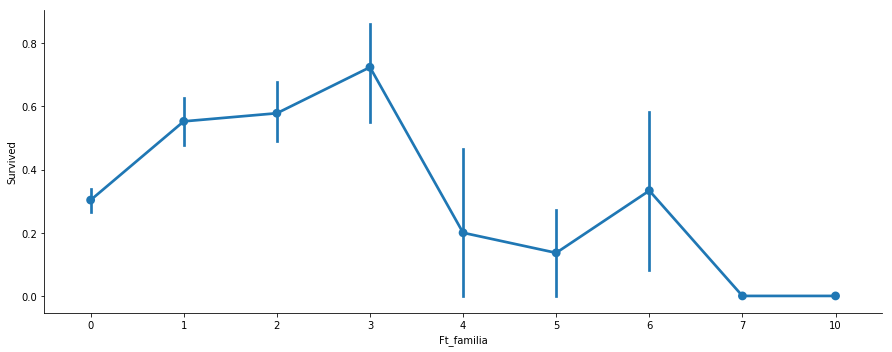

In [1564]:
axes = sns.factorplot('Ft_familia','Survived', 
                      data=titanic, aspect = 2.5, )

In [1574]:
titanic.loc[titanic.Ft_familia==0, 'Ft_Tm_Familia']=0
titanic.loc[(titanic.Ft_familia>=1)&(titanic.Ft_familia<=3), 'Ft_Tm_Familia']=1
titanic.loc[titanic.Ft_familia>=4,'Ft_Tm_Familia']=3


In [1575]:
titanic.groupby(['Ft_Tm_Familia']).Ft_Tm_Familia.count()

Ft_Tm_Familia
0.0    790
1.0    437
3.0     82
Name: Ft_Tm_Familia, dtype: int64

## Nomrmalização Age e Fare Min/Max

In [1576]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit and transform in one step
titanic['Norm_Age'] = scaler.fit_transform(titanic[['Age']])
titanic['Norm_Fare'] = scaler.fit_transform(titanic[['Fare']])



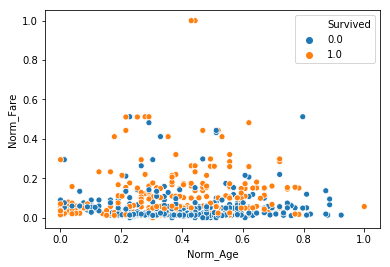

In [1577]:
ax = sns.scatterplot(x="Norm_Age", y="Norm_Fare", hue='Survived', data=titanic)

## Ft_Prioridade

In [1578]:
titanic.loc[titanic.Fx_Age=='1_11','Ft_Prioridade']= 0

titanic.loc[(titanic.Age>=11)& (titanic.Sex=='female'),'Ft_Prioridade']=1

titanic.loc[(titanic.Age>=11)&(titanic.Sex=='male'),'Ft_Prioridade']   = 2

# Label Enconding

In [1580]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
level_0            1309 non-null int64
index              1309 non-null int64
Age                1309 non-null float64
Cabin              1309 non-null object
Embarked           1309 non-null object
Fare               1309 non-null float64
Name               1309 non-null object
Parch              1309 non-null int64
PassengerId        1309 non-null int64
Pclass             1309 non-null int64
Sex                1309 non-null object
SibSp              1309 non-null int64
Survived           891 non-null float64
Ticket             1309 non-null object
Status_Survived    891 non-null object
Title              1309 non-null object
Age_y              1309 non-null float64
Ft_Cabin           1309 non-null object
Fx_Fare            1309 non-null object
Fx_Age             1309 non-null object
Ft_Alone           1309 non-null int64
Ft_familia         1309 non-null int64
Ft_Tm_Familia      

In [1583]:
label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Pclass)
titanic['OneHt_Ft_Pclass'] = label_encoder.transform(titanic.Pclass)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Sex)
titanic['OneHt_Ft_Sex'] = label_encoder.transform(titanic.Sex)


label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Ft_Cabin)
titanic['OneHt_Ft_Cabin'] = label_encoder.transform(titanic.Ft_Cabin)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Title)
titanic['OneHt_Ft_Title'] = label_encoder.transform(titanic.Title)


label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Embarked)
titanic['OneHt_Embarked'] = label_encoder.transform(titanic.Embarked)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Fx_Age)
titanic['OneHt_Fx_Age'] = label_encoder.transform(titanic.Fx_Age)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Fx_Fare)
titanic['OneHt_Fx_Fare'] = label_encoder.transform(titanic.Fx_Fare)

label_encoder  = LabelEncoder()
label_encoder  = label_encoder.fit(titanic.Ft_Prioridade)
titanic['OneHt_Ft_Prioridade'] = label_encoder.transform(titanic.Ft_Prioridade)

In [1388]:
feture=titanic[['Survived',
'OneHt_Ft_Pclass',
'OneHt_Ft_Sex',
'OneHt_Ft_Cabin',
'OneHt_Ft_Title',
'OneHt_Ft_Sobrenome',
'OneHt_Ft_SibSp',
'OneHt_Ft_Parch',
'OneHt_Embarked',
'OneHt_Civil',
'OneHt_Fx_Age',
'OneHt_Fx_Fare',
'OneHt_Ft_Deck',
'OneHt_Ft_Prioridade']]

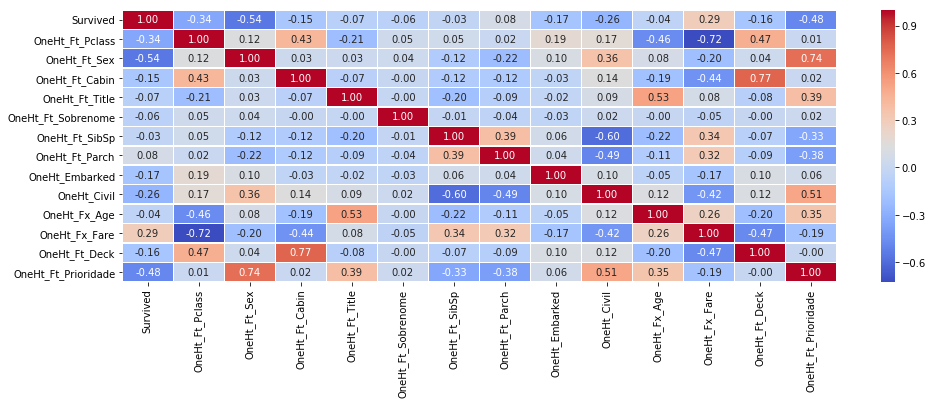

In [1389]:
plt.figure(figsize = (16,5))

g = sns.heatmap(feture.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", linewidths=.5)


## Binarização

In [1390]:
#titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Pclass"] , prefix="BIN_Pclass")
#titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Sex"]    , prefix="BIN_Sex")      
#titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Prioridade"], prefix="BIN_Prioridade")

titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Cabin"]  , prefix="BIN_Ft_Cabin"  ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Embarked"]  , prefix="BIN_Embarked"  ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Civil"]     , prefix="BIN_Civil"     ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Fx_Age"]   , prefix="BIN_Fx_Age"   ,drop_first=True)

titanic = pd.get_dummies(titanic, columns = ["OneHt_Fx_Fare"]   , prefix="BIN_Fx_Fare"   ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Deck"]   , prefix="BIN_Ft_Deck"   ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Title"]  , prefix="BIN_Ft_Title"  ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_SibSp"]  , prefix="BIN_Ft_SibSp"  ,drop_first=True)
titanic = pd.get_dummies(titanic, columns = ["OneHt_Ft_Parch"]  , prefix="BIN_Ft_Parch"  ,drop_first=True)



# Construindo Modelo



In [1391]:
print(titanic[0:891].Survived.isna().sum())
print(titanic[891:1309].Survived.isna().sum())

0
418


In [1392]:
titanic.loc[titanic.Status_Survived=='Morto','Survived']='0'
titanic.loc[titanic.Status_Survived=='Vivo' ,'Survived']='1'

train=titanic[0:891]
test= titanic[891:1309]
IDtest = test_csv['PassengerId']

In [1393]:
titanic.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [1394]:
train.groupby('Survived').Survived.count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [1395]:
 train = train.drop(labels =['level_0','index','PassengerId','Name', 'Pclass', 'Sex','Title',
                            'Ticket','SibSp','Parch','Cabin','Embarked','Age','Age_y','Fare',
                            'Norm_Age','Norm_Fare',
                            'Fx_Age',
                            'Fx_Fare',
                            'Status_Survived',
                            'Ft_Cabin',
                            'Ft_Sobrenome',
                            'Ft_Civil',
                            'Ft_Prioridade',
                            'Ft_Deck'
                            ],
                    axis = 1)

In [1396]:
 test = test.drop(labels =['level_0','index','PassengerId','Name', 'Pclass', 'Sex','Title',
                            'Ticket','SibSp','Parch','Cabin','Embarked','Age','Age_y','Fare',
                            'Norm_Age','Norm_Fare', 
                            'Fx_Age',
                            'Fx_Fare',
                            'Status_Survived',
                            'Ft_Cabin',
                            'Ft_Sobrenome',
                            'Ft_Civil',
                            'Ft_Prioridade',
                            'Ft_Deck'
                            ],
                    axis = 1)

In [1397]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 47 columns):
Survived               891 non-null object
OneHt_Ft_Pclass        891 non-null int64
OneHt_Ft_Sex           891 non-null int32
OneHt_Ft_Sobrenome     891 non-null int32
OneHt_Ft_Prioridade    891 non-null int64
BIN_Ft_Cabin_1         891 non-null uint8
BIN_Ft_Cabin_2         891 non-null uint8
BIN_Ft_Cabin_3         891 non-null uint8
BIN_Ft_Cabin_4         891 non-null uint8
BIN_Ft_Cabin_5         891 non-null uint8
BIN_Ft_Cabin_6         891 non-null uint8
BIN_Ft_Cabin_7         891 non-null uint8
BIN_Ft_Cabin_8         891 non-null uint8
BIN_Ft_Cabin_9         891 non-null uint8
BIN_Embarked_1         891 non-null uint8
BIN_Embarked_2         891 non-null uint8
BIN_Civil_1            891 non-null uint8
BIN_Civil_2            891 non-null uint8
BIN_Civil_3            891 non-null uint8
BIN_Fx_Age_1           891 non-null uint8
BIN_Fx_Age_2           891 non-null uint8
BIN_Fx_Age_3

In [1072]:
train.head()

,Survived,OneHt_Ft_Sobrenome,OneHt_Fx_Age,BIN_Pclass_0,BIN_Pclass_1,BIN_Pclass_2,BIN_Sex_0,BIN_Sex_1,BIN_Prioridade_0,BIN_Prioridade_1,...,BIN_Ft_SibSp_4,BIN_Ft_SibSp_5,BIN_Ft_SibSp_6,BIN_Ft_Parch_1,BIN_Ft_Parch_2,BIN_Ft_Parch_3,BIN_Ft_Parch_4,BIN_Ft_Parch_5,BIN_Ft_Parch_6,BIN_Ft_Parch_7
0,0,100,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,182,5,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,329,3,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,267,5,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,15,5,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1398]:
from sklearn.model_selection import train_test_split

y_train = np.array(train[["Survived"]])
X_train = np.array(train.drop(labels = ["Survived"],axis = 1))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [1399]:
X_train

array([[  2,   1, 100, ...,   0,   0,   0],
       [  0,   0, 182, ...,   0,   0,   0],
       [  2,   0, 329, ...,   0,   0,   0],
       ...,
       [  2,   0, 383, ...,   0,   0,   0],
       [  0,   1,  69, ...,   0,   0,   0],
       [  2,   1, 214, ...,   0,   0,   0]], dtype=int64)

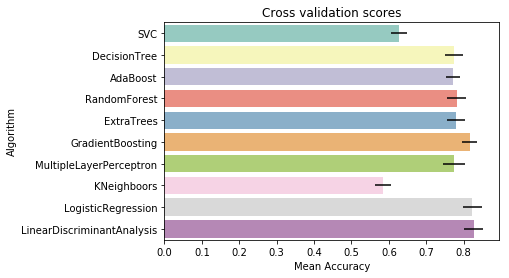

In [1400]:
# Modeling step Test differents algorithms 
kfold = StratifiedKFold(n_splits=5)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [4253]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_


Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 336 out of 336 | elapsed:    0.8s finished


0.7957351290684624

In [4254]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:    8.7s finished


0.8069584736251403

In [4255]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 162 out of 162 | elapsed:    9.2s finished


0.8047138047138047

In [4256]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:    4.5s finished


0.8069584736251403

In [4257]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done  84 out of  84 | elapsed:    5.6s finished


0.7699214365881033

In [4258]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 336 out of 336 | elapsed:    0.7s finished


0.7957351290684624

In [4259]:
neighbors = np.arange(1, 9)
weight_options = ["uniform", "distance"]

knn = KNeighborsClassifier()

param_grid = dict(n_neighbors = neighbors, weights = weight_options)

gsKNN = GridSearchCV(knn, cv=kfold, param_grid = param_grid, scoring="accuracy", n_jobs= 4, verbose = 1)

gsKNN.fit(X_train,y_train)
    
Knn_best = gsKNN.best_estimator_

gsKNN.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:    0.4s finished


0.6632996632996633

In [4260]:
param_grid={"C":np.logspace(-3,3,7), 
            "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg= LogisticRegression()

gslogreg = GridSearchCV(logreg, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

gslogreg.fit(X_train, y_train)

lgreg_best =  gslogreg.best_estimator_

gslogreg.best_score_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


0.8204264870931538

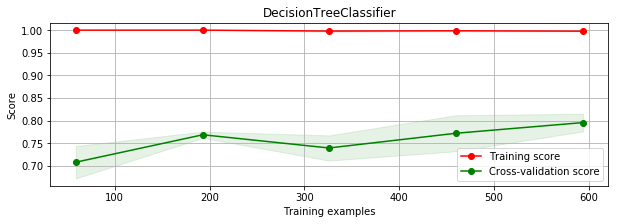

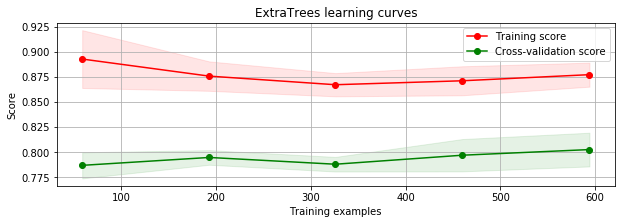

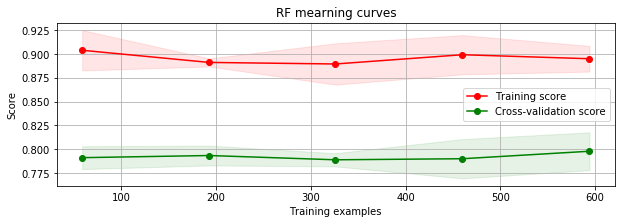

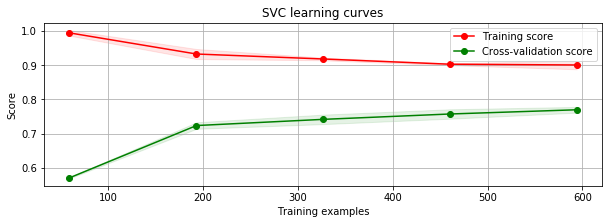

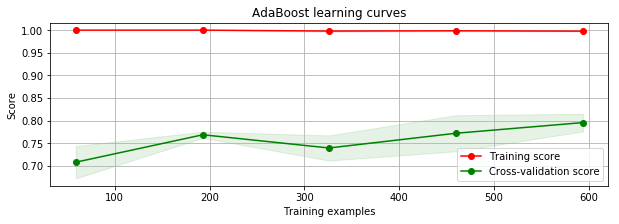

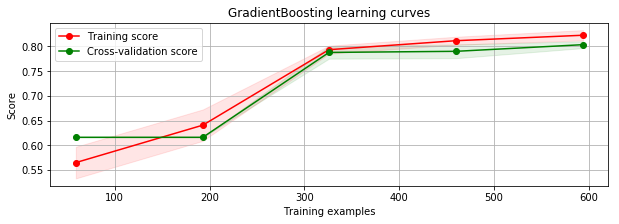

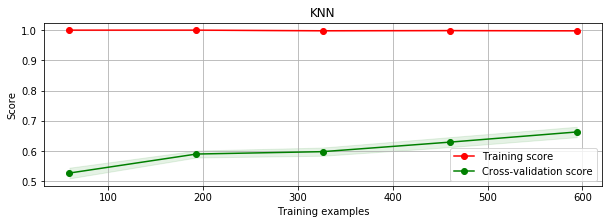

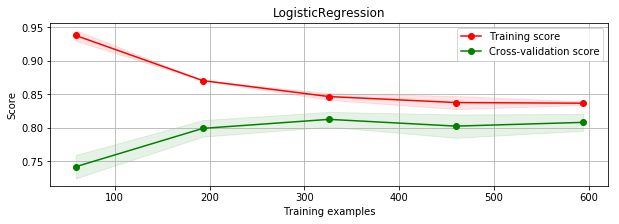

In [4261]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure(figsize = (10,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"DecisionTreeClassifier",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsKNN.best_estimator_,"KNN",X_train,y_train,cv=kfold)
g = plot_learning_curve(gslogreg.best_estimator_,"LogisticRegression",X_train,y_train,cv=kfold)

# Feature Selection Baseado em Algoritmos de Árvore

In [4262]:
X_feature_select= train.drop(labels = ["Survived"],axis = 1)

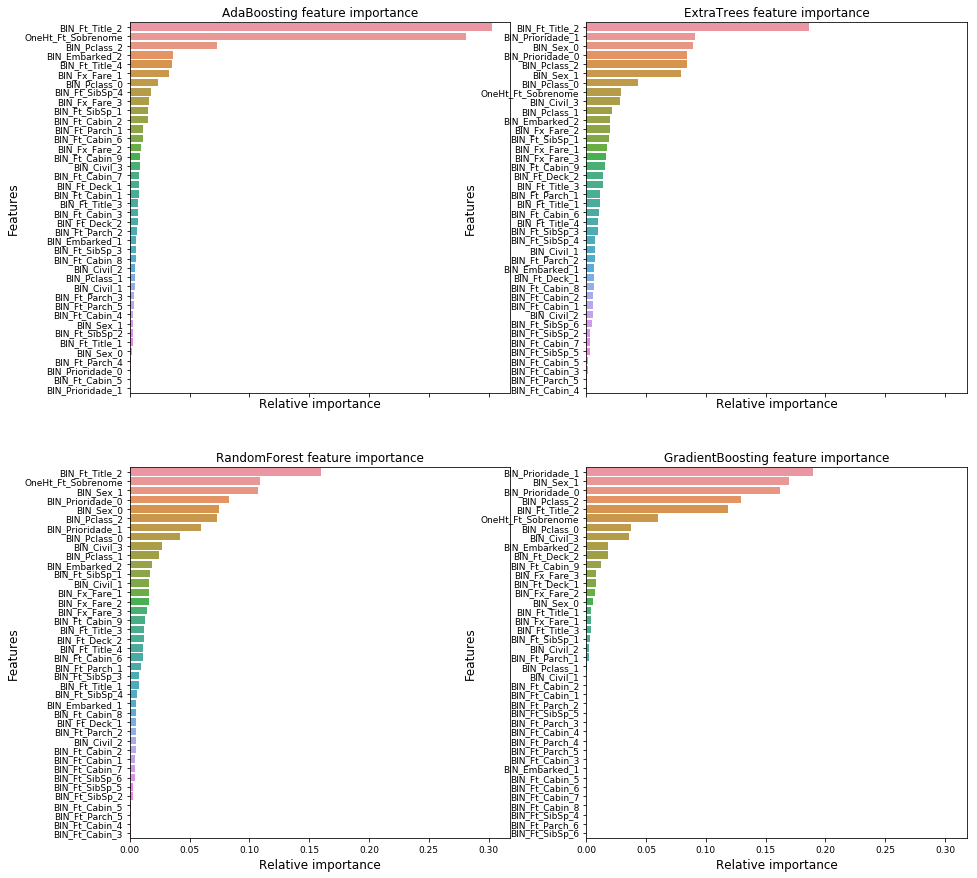

In [4263]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),
                     ("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),
                     ("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_feature_select.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1


# Predict

In [4264]:
#y = np.array(train[["Survived"]])
#X = np.array(train.drop(labels = ["Survived"],axis = 1))
y_test = np.array(test[["Survived"]])
X_test = np.array(test.drop(labels = ["Survived"],axis = 1))


In [4265]:
votingC = VotingClassifier(estimators=[('rfc',    RFC_best), 
                                       ('extc',   ExtC_best),
                                       ('svc',    SVMC_best) ,
                                       ('adac',   ada_best),
                                       ('gbc',    GBC_best),
                                       ('logreg', lgreg_best)
                                       ], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)


In [4270]:
#test_Survived = pd.Series(votingC.predict(X_test), name="Survived")

test_Survived = pd.Series(gslogreg.predict(X_test) , name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1,ignore_index=False)

results.to_csv("ensemble_python_voting.csv",index=False)

In [4271]:
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
